In [1]:
import pandas as pd
from google.colab import files
uploaded=files.upload()
df = pd.read_csv('twitter_training.csv')




Saving twitter_training.csv to twitter_training.csv


In [2]:
print(df.head())


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [3]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handle missing values
df.dropna(inplace=True)  # or use df.fillna() to fill missing values


In [4]:
print(df.describe())


               2401
count  71655.000000
mean    6436.493559
std     3742.287116
min        1.000000
25%     3199.000000
50%     6433.000000
75%     9604.000000
max    13200.000000


Index(['ID', 'Entity', 'Sentiment', 'Text'], dtype='object')
     ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


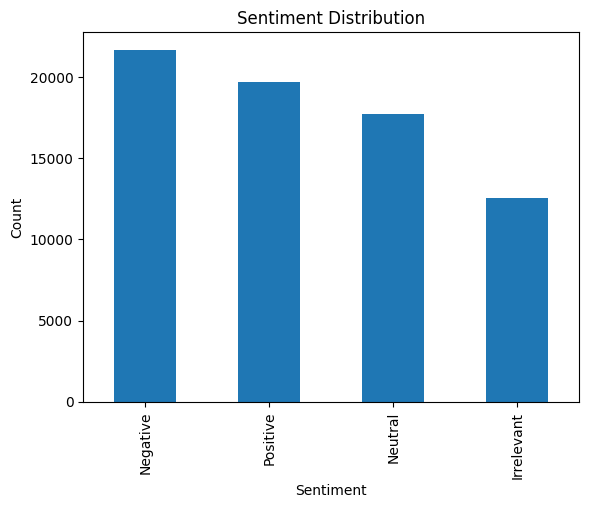

In [5]:

import matplotlib.pyplot as plt



# Rename columns based on inspection
df.columns = ['ID', 'Entity', 'Sentiment', 'Text']

# Check column names and first few rows
print(df.columns)
print(df.head())

# Plot sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


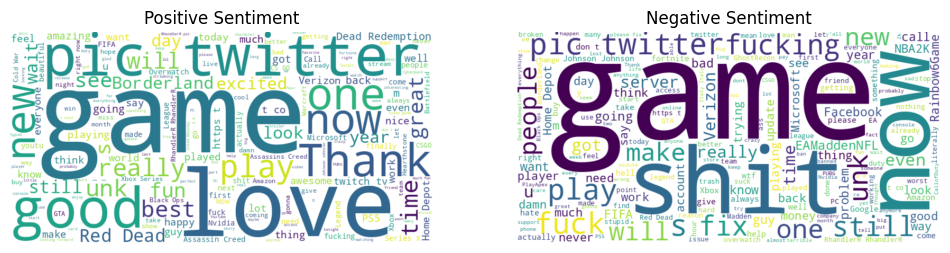

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate text for positive and negative sentiments
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Text'])
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Text'])

# Create WordCloud objects
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))

# Positive sentiment word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

# Negative sentiment word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.show()


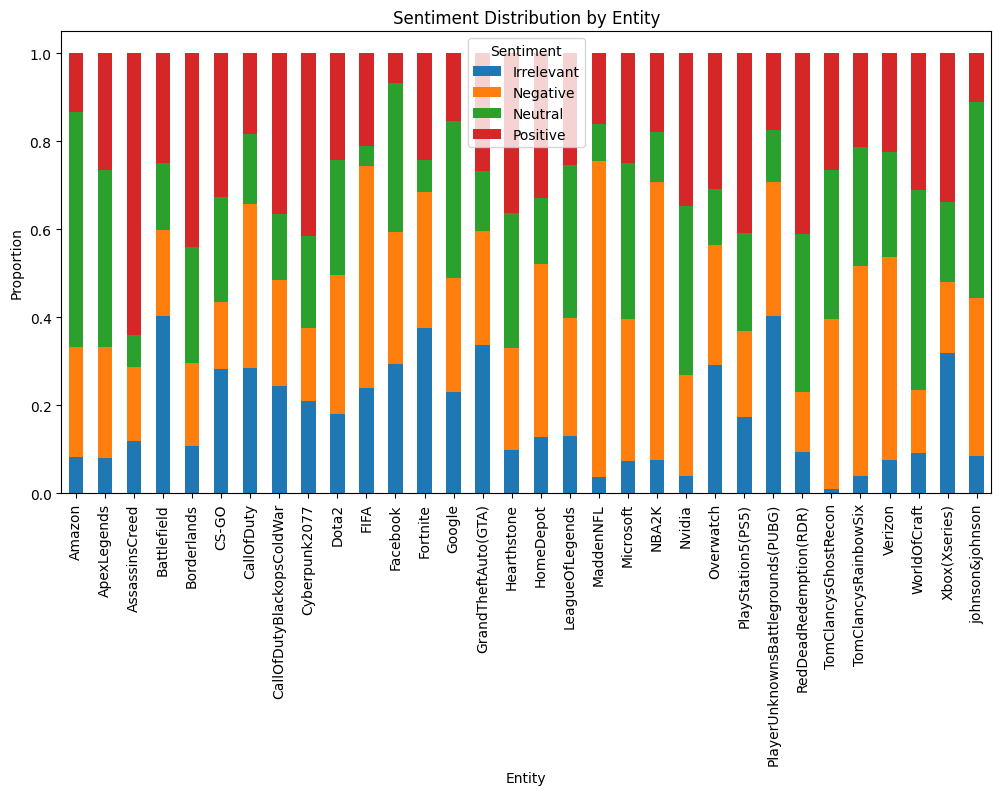

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Entity' and calculate sentiment counts
entity_sentiment = df.groupby('Entity')['Sentiment'].value_counts().unstack().fillna(0)

# Normalize sentiment counts to proportions
entity_sentiment = entity_sentiment.div(entity_sentiment.sum(axis=1), axis=0)

# Plotting sentiment distribution per entity
entity_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()
